In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('./data/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# Preprocessing
labels = dataset['Class']
unsupervised_df = dataset.drop(columns=['Class'])

# Normalizing the Data
# normalizer = StandardScaler()
# unsupervised_data = normalizer.fit_transform(unsupervised_df)

scaler = MinMaxScaler(feature_range=(0, 1))
unsupervised_data = scaler.fit_transform(unsupervised_df)
print(np.min(unsupervised_data))
# unsupervised_df['Class'] = labels
# Split dataset into train-test splits
x_train, x_test, y_train, y_test = train_test_split(unsupervised_data, np.array(labels), test_size=0.2)
#print(x_train[0])

0.0


In [21]:
gmm = GaussianMixture(n_components=2)

prediction_train = gmm.fit_predict(x_train)

# Checking accuracy with respect to training data
num_non_zero = np.count_nonzero(prediction_train == y_train)
print(f'Success Rate: {num_non_zero / len(x_train) * 100} percent')

Success Rate: 79.11913801048959 percent


In [22]:
# Testing on testing data
prediction_test = gmm.predict(x_test)
num_non_zero = np.count_nonzero(prediction_test == y_test)
print(f'Success Rate: {num_non_zero / len(x_test) * 100} percent')

Success Rate: 78.99652399845512 percent


In [8]:
# Evaluating definition of clusters
train_silhouette_score = silhouette_score(x_train, prediction_train)
test_silhouette_score = silhouette_score(x_test, prediction_test)

print(f'Silhouette score on train data = {train_silhouette_score}')
print(f'Silhouette score on test data = {test_silhouette_score}')

KeyboardInterrupt: 

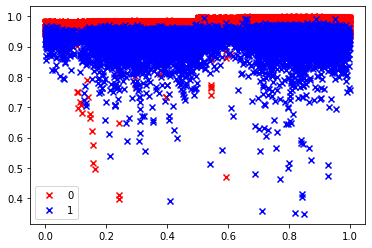

In [23]:
# Plotting based on test

toPlotMal = x_test[prediction_test == 0]
toPlotBen = x_test[prediction_test == 1]

plt.scatter(toPlotMal[:, 0], toPlotMal[:, 1], c = "red", marker = 'x', label = "0")
plt.scatter(toPlotBen[:, 0], toPlotBen[:, 1], c = "blue", marker = 'x', label = "1")
plt.legend()
plt.show()